<a href="https://colab.research.google.com/github/SoniaVG/Reinforcement-Learning-IA/blob/main/Frozen_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frozen Lake**
# MONTECARLO METHOD

#  On policy


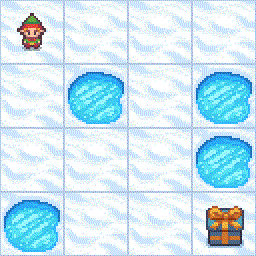

In [14]:
from IPython.display import clear_output
!pip install gymnasium
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm
import gymnasium as gym


clear_output()

In [15]:
env = gym.make("FrozenLake-v1",  render_mode="rgb_array", is_slippery=False)


print("Estado inicial:",env.reset())
print("Espacio de acciones: ",env.action_space)
print("Espacio de observaciones: ", env.observation_space)
print("Reward: ",env.reward_range)

Estado inicial: (0, {'prob': 1})
Espacio de acciones:  Discrete(4)
Espacio de observaciones:  Discrete(16)
Reward:  (0, 1)


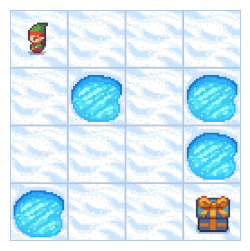

In [17]:
# Reiniciar al estado inicial
env.reset()

# Dar un paso, ejerciendo la acción 0
observation, reward, done, info, _  = env.step(0)

# Dibujar el estado actual
plt.figure(figsize=(3, 3))
plt.axis("off")
plt.imshow(env.render())


Número de acciones 4
observation 0 ; reward 0.0 ; done? False
observation 4 ; reward 0.0 ; done? False
observation 5 ; reward 0.0 ; done? True


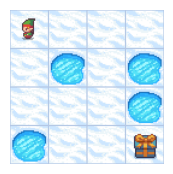

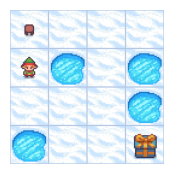

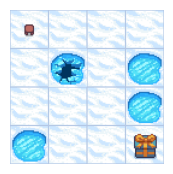

In [18]:
# Politica aleatoria
numActions = env.action_space.n

env.reset()
print("Número de acciones",numActions)

for action in range(numActions):
  observation, reward, done, info,_ = env.step(action)
  print("observation", observation, "; reward", reward, "; done?",done)
  plt.figure(figsize = (20,2))
  plt.axis("off")
  plt.imshow(env.render())
  if done:
    break

In [20]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import seaborn as sns


# La politica gredy toma un estado del 0-3 con un 20% de probabiliad
# si no, toma un estado con el valor máximo y escoge aleatoriamente un valor de 0-máximo
# o si todos son iguales, devuelve una de la acciones con mayor valor de estado(iguales)
action_values = np.zeros((16,4))

def policy(state, epsilon=0.20):
  if np.random.random()< epsilon:
    return np.random.choice(4)
  else:
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))


policy(0, epsilon=0.20)

3

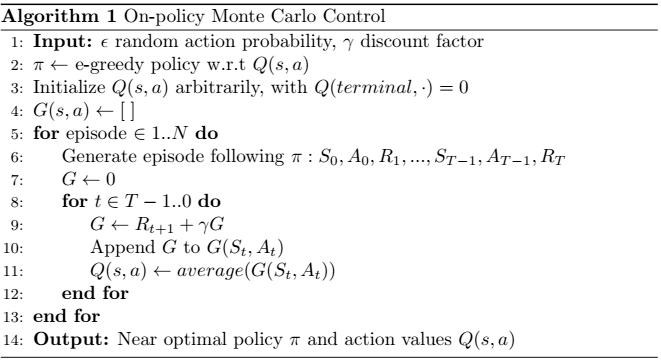

In [21]:
def on_policy_montecarlo(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
  gsa_returns = {} #retorno para cada par de estado-valor

  for episode in range(1, episodes+1):
    state = env.reset()[0] #estado inicial
    done = False
    transition = [] # para ir guardando S0,A0,R1, S1,A1,R1,..., S_{T-1},A_{T-1},R_{T}

    while not done: # genera una secuencia para guardar en transición
      action= policy(state, epsilon=0.20)
      new_state, reward,done, _, _ = env.step(action)
      transition.append([state, action, reward])
      state = new_state

    G = 0

    for state_t, action_t, reward_t in reversed(transition):
      G = reward_t + gamma*G
      if not (state_t, action_t)  in gsa_returns:
        #print(gsa_returns)
        gsa_returns[(state_t, action_t)] = []
        #print(gsa_returns)
      gsa_returns[(state_t,action_t)].append(G)
      action_values[state_t][action_t]=np.mean(gsa_returns[(state_t,action_t)])



In [22]:
action_values = np.zeros((16,4))
on_policy_montecarlo(policy, action_values, 100, gamma=0.99, epsilon=0.2)

In [26]:
action_values
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3
#------------3------
#------------|------
#------0-<--- --->-2
#----- ------|------
#------------1------

array([[0.05709483, 0.        , 0.66202093, 0.12180845],
       [0.34143861, 0.        , 0.76400195, 0.66861124],
       [0.47076385, 0.76097031, 0.3154117 , 0.47790452],
       [0.480298  , 0.        , 0.        , 0.15849834],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.73136918, 0.        , 0.42884464],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.70007143, 0.        ],
       [0.69307071, 0.94264443, 0.        , 0.20274653],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.980179  , 1.        , 0.735075  ],
       [0.        , 0.        , 0.        , 0.        ]])

Q( 0 ,a)= [0.05709483 0.         0.66202093 0.12180845]
Q( 1 ,a)= [0.34143861 0.         0.76400195 0.66861124]
Q( 2 ,a)= [0.47076385 0.76097031 0.3154117  0.47790452]
Q( 3 ,a)= [0.480298   0.         0.         0.15849834]
Q( 4 ,a)= [0. 0. 0. 0.]
Q( 5 ,a)= [0. 0. 0. 0.]
Q( 6 ,a)= [0.         0.73136918 0.         0.42884464]
Q( 7 ,a)= [0. 0. 0. 0.]
Q( 8 ,a)= [0. 0. 0. 0.]
Q( 9 ,a)= [0.         0.         0.70007143 0.        ]
Q( 10 ,a)= [0.69307071 0.94264443 0.         0.20274653]
Q( 11 ,a)= [0. 0. 0. 0.]
Q( 12 ,a)= [0. 0. 0. 0.]
Q( 13 ,a)= [0. 0. 0. 0.]
Q( 14 ,a)= [0.       0.980179 1.       0.735075]
Q( 15 ,a)= [0. 0. 0. 0.]
posiciones de Q(s,a) con valores maximos [2 2 1 0 0 0 1 0 0 2 1 0 0 0 2 0]


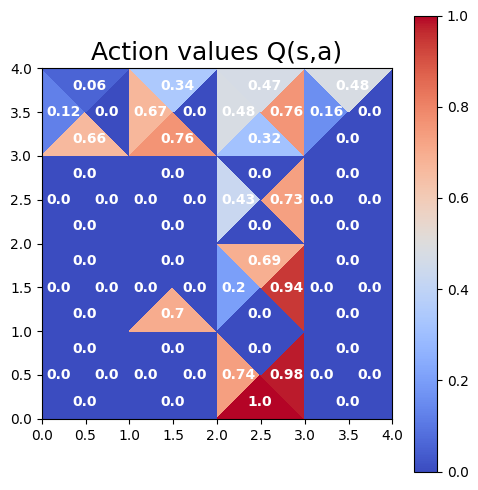

In [33]:
def plot_action_values(action_values):
    # Modificar las filas
    #     * 1
    #  *4     * 2
    #     * 3
    text_positions = [
        [
         (0.35, 3.75), (1.35, 3.75), (2.35, 3.75), (3.35, 3.75),
         (0.35, 2.75), (1.35, 2.75), (2.35, 2.75), (3.35, 2.75),
         (0.35, 1.75), (1.35, 1.75), (2.35, 1.75), (3.35, 1.75),
         (0.35, 0.75), (1.35, 0.75), (2.35, 0.75), (3.35, 0.75)],

        [
         (0.6, 3.45), (1.6, 3.45), (2.6, 3.45), (3.6, 3.45),
         (0.6, 2.45), (1.6, 2.45), (2.6, 2.45), (3.6, 2.45),
         (0.6, 1.45), (1.6, 1.45), (2.6, 1.45), (3.6, 1.45),
         (0.6, 0.45), (1.6, 0.45), (2.6, 0.45), (3.6, 0.45)],

        [
         (0.35, 3.15), (1.35, 3.15), (2.35, 3.15), (3.35, 3.15),
         (0.35, 2.15), (1.35, 2.15), (2.35, 2.15), (3.35, 2.15),
         (0.35, 1.15), (1.35, 1.15), (2.35, 1.15), (3.35, 1.15),
         (0.35, 0.15), (1.35, 0.15), (2.35, 0.15), (3.35, 0.15)],

        [
         (0.05, 3.45), (1.05, 3.45), (2.05, 3.45), (3.05, 3.45),
         (0.05, 2.45), (1.05, 2.45), (2.05, 2.45), (3.05, 2.45),
         (0.05, 1.45), (1.05, 1.45), (2.05, 1.45), (3.05, 1.45),
         (0.05, 0.45), (1.05, 0.45), (2.05, 0.45), (3.05, 0.45)]]

    fig, ax = plt.subplots(figsize=(5, 5))
    tripcolor = quatromatrix(action_values, ax=ax,
                             triplotkw={"color": "k", "lw": 1}, tripcolorkw={"cmap": "coolwarm"})
    ax.margins(0)
    ax.set_aspect("equal")
    fig.colorbar(tripcolor)

    for j, av in enumerate(text_positions):
        for i, (xi, yi) in enumerate(av):
            plt.text(xi, yi, round(action_values[:, :, j].flatten()[i], 2), size=10, color="w", weight="bold")

    plt.title("Action values Q(s,a)", size=18)
    plt.tight_layout()
    plt.show()


def quatromatrix(action_values, ax=None, triplotkw=None, tripcolorkw=None):
    action_values = np.flipud(action_values)
    n = 4
    m = 4
    a = np.array([[0, 0], [0, 1], [.5, .5], [1, 0], [1, 1]])
    tr = np.array([[0, 1, 2], [0, 2, 3], [2, 3, 4], [1, 2, 4]])
    A = np.zeros((n * m * 5, 2))
    Tr = np.zeros((n * m * 4, 3))
    for i in range(n):
        for j in range(m):
            k = i * m + j
            A[k * 5:(k + 1) * 5, :] = np.c_[a[:, 0] + j, a[:, 1] + i]
            Tr[k * 4:(k + 1) * 4, :] = tr + k * 5
    C = np.c_[action_values[:, :, 3].flatten(), action_values[:, :, 2].flatten(),
              action_values[:, :, 1].flatten(), action_values[:, :, 0].flatten()].flatten()

    ax.triplot(A[:, 0], A[:, 1], Tr, **triplotkw)
    tripcolor = ax.tripcolor(A[:, 0], A[:, 1], Tr, facecolors=C, **tripcolorkw)
    return tripcolor


new = action_values.reshape((4, 4,4))
for i in range(16):
  print("Q(",i,",a)=", action_values[i])
print("posiciones de Q(s,a) con valores maximos",action_values.argmax(-1))
plot_action_values(new)


In [ ]:
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3
#------------3------
#------------|------
#------0-<--- --->-2
#----- ------|------
#------------1------

Estados [0, 1, 2, 6, 10, 14]


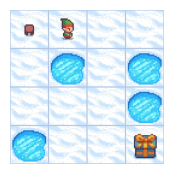

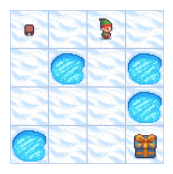

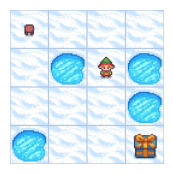

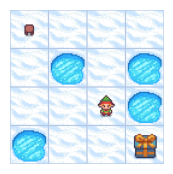

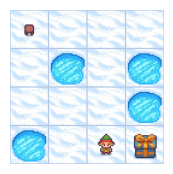

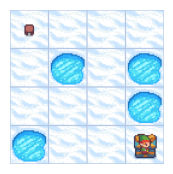

In [37]:
#politica inducida por values_table
def accionTomada(env):
  maximos = np.argmax(action_values,axis=1)
  #print(maximos)
  done = False
  observacion = env.reset()[0] #estado inicial

  camino =[]
  while not done:
    camino.append(observacion)
    observacion, reward, done, info,_ = env.step(maximos[observacion]) #observacion:0-15

    plt.figure(figsize = (20,2))
    plt.axis("off")
    plt.imshow(env.render())

  print("Estados",camino)

env.reset()
accionTomada(env)


# Off Policy-Monte Carlo Method


In [38]:
# Crear tabla Q(s,a) inicializando con -100 y 0 al estado con el premio
action_values = np.full((16,4),-100)
action_values[15]=0
action_values

array([[-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [-100, -100, -100, -100],
       [   0,    0,    0,    0]])

In [61]:
# Crear la politica pi(s)

def target_policy(state):
  av = action_values[state]
  #print(av)
  return np.random.choice(np.flatnonzero(av==av.max()))

action = target_policy(0)
action

0

In [62]:
# Crear politica b(s)

def exploratori_policy(state, epsilon = 0.2):
  if np.random.random()<epsilon:
    return np.random.choice(4)
  else:
    av=action_values[state]
    return np.random.choice(np.flatnonzero(av==av.max()))


action = exploratori_policy(0, epsilon = 0.2)
action

2

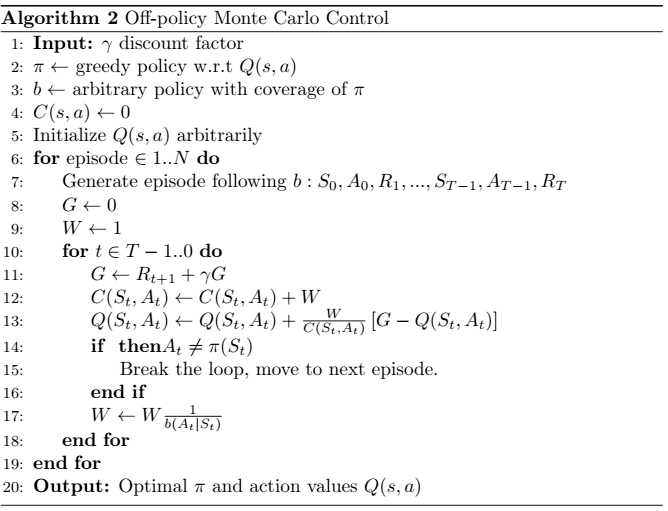

In [71]:
def off_policy_mc_control(action_values, target_policy, exploratori_policy, episodes=100, gamma=0.99, epsilon=0.2):
  csa = np.zeros((16,4))

  for episode in range(1, episodes+1):
      G = 0
      W = 1
      state = env.reset()[0]
      done = False
      transition = []

      while not done:
          action = exploratori_policy(state, epsilon = 0.2)
          next_state, reward, done, _,_ =env.step(action)
          transition.append([state, action, reward])
          state = next_state

      for state_t, action_t, reward_t in reversed(transition):
          G = reward_t +  gamma * G
          csa[state_t][action_t] = csa[state_t][action_t] + W
          qsa = action_values[state_t][action_t]
          action_values[state_t][action_t] += (W/csa[state_t][action_t])* (G-qsa)

          if action_t != target_policy(state_t):
              break

          W = W * (1.0 / 1-epsilon + epsilon /4 )

In [83]:
# Crear tabla Q(s,a)

action_values = np.full((16,4),-100)
action_values[15] = 0
env.reset()

# Entrenamiento
off_policy_mc_control(action_values, target_policy, exploratori_policy, episodes=1000, gamma=0.99, epsilon=0.2)

*Los valores con -100, son los estados y las acciones descartadas por ejemplo, los estados 5, 7, 11 y 12 están los agujeros, por eso los descarta en los estados restantes, el q value maximo te dice la accion a tomar por ejemplo en el estado  14, la accion a tomar es 2, que es derecha.*


> LEFT = 0

> DOWN = 1

> RIGHT = 2

> UP = 3

[[   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0 -100]
 [-100 -100 -100 -100]
 [   0    0    0 -100]
 [-100 -100 -100 -100]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]
 [-100 -100 -100 -100]
 [-100 -100 -100 -100]
 [   0 -100    0    0]
 [-100    0    1 -100]
 [   0    0    0    0]]


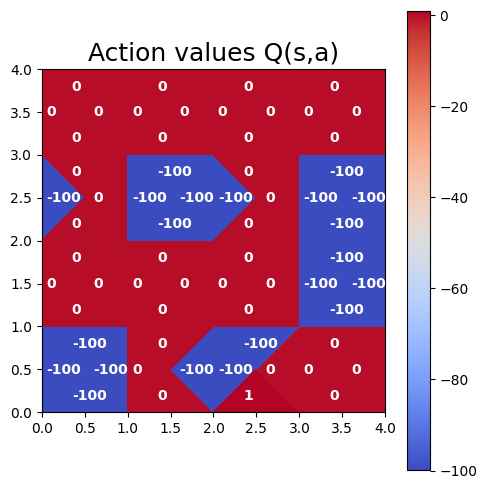

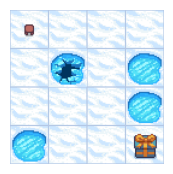

In [84]:
print(action_values)
new = action_values.reshape((4, 4, 4))
plot_action_values(new)

plt.figure(figsize = (20,2))
plt.axis("off")
plt.imshow(env.render())